In [ ]:
# Upload the file from local system
from google.colab import files
uploaded = files.upload()

# Import pandas
import pandas as pd

# Read the Excel file
df = pd.read_csv('bank.csv')

# Display the first 100 rows
df.head(100)


Saving bank.csv to bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,management,divorced,tertiary,no,122,yes,no,unknown,19,may,1622,2,-1,0,unknown,yes
96,30,technician,single,tertiary,no,880,yes,yes,unknown,19,may,967,6,-1,0,unknown,yes
97,41,technician,married,secondary,no,501,yes,no,unknown,19,may,579,5,-1,0,unknown,yes
98,36,blue-collar,married,secondary,no,4438,yes,no,unknown,20,may,446,1,-1,0,unknown,yes


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all categorical columns including target
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Now your target 'deposit' is already encoded
X = df.drop('deposit', axis=1)
y = df['deposit']

df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:

# Encode categorical features including target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('deposit', axis=1)  # drop your actual target column
y = df['deposit']               # use actual target column



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
# 5️⃣ Train Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

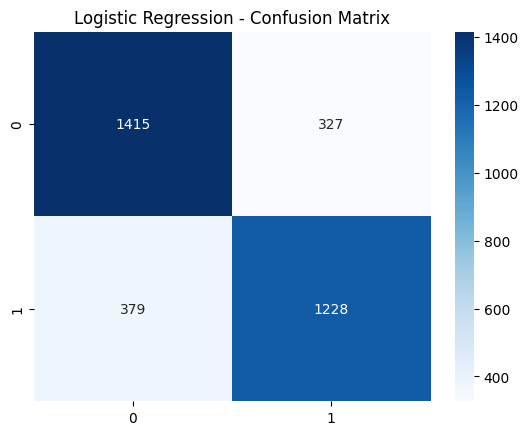

Logistic Regression F1 Score: 0.7767


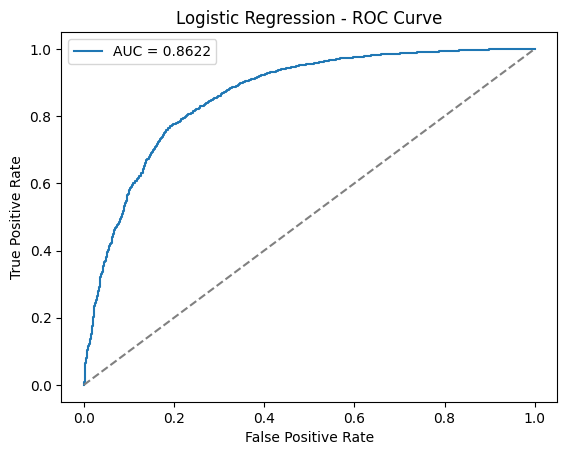

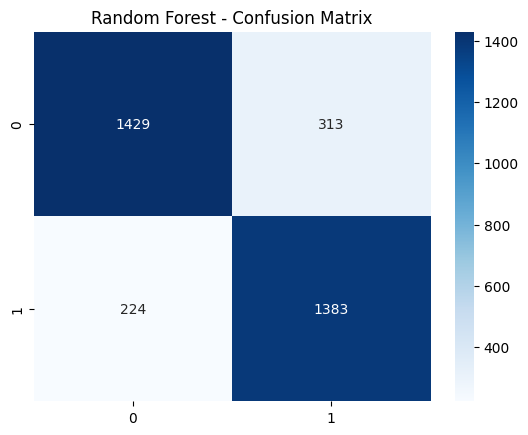

Random Forest F1 Score: 0.8374


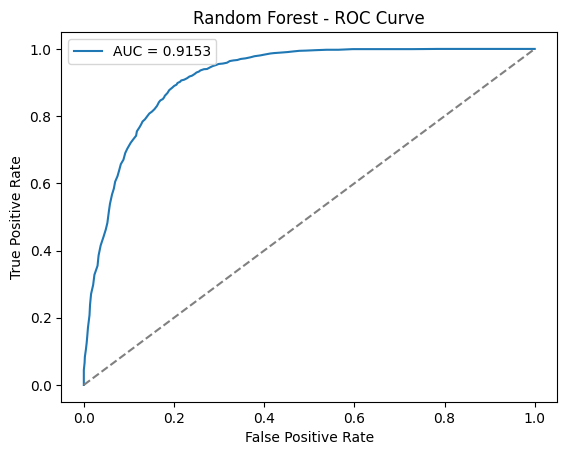

In [ ]:
# 6️⃣ Model Evaluation
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} F1 Score: {f1:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

# Evaluate Logistic Regression
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is already loaded as df
# df = pd.read_csv("your_file.csv")

# List all categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols)

# Set style
sns.set(style="whitegrid")

# Plot each categorical feature
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()


Categorical Columns: Index([], dtype='object')


In [ ]:
#
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7891908032248433
Random Forest Accuracy: 0.8396536279486414


In [ ]:
# 1️⃣ Import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 2️⃣ Scale features for SVM (important for SVM performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3️⃣ Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:,1]

# Evaluate Gradient Boosting
print("=== Gradient Boosting ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_gb):.4f}\n")

# 4️⃣ SVM (Support Vector Machine)
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:,1]

# Evaluate SVM
print("=== Support Vector Machine ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svm):.4f}")


=== Gradient Boosting ===
Accuracy: 0.8426
F1 Score: 0.8396
ROC-AUC: 0.9229

=== Support Vector Machine ===
Accuracy: 0.8104
F1 Score: 0.8050
ROC-AUC: 0.8908


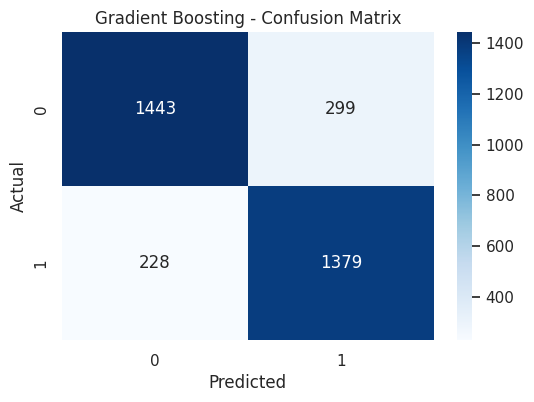

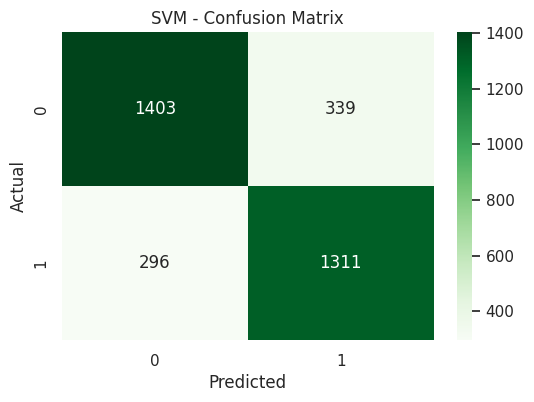

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Gradient Boosting Confusion Matrix ---
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- SVM Confusion Matrix ---
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


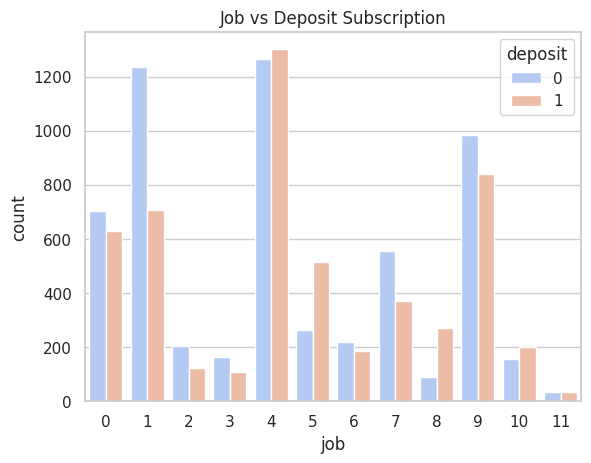

In [ ]:
sns.countplot(data=df, x='job', hue='deposit', palette="coolwarm")
plt.title("Job vs Deposit Subscription")
plt.show()
